In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

## Analyse electricity production by source (% of total) in the largest economies

In [ ]:
#Get a list of countries by GDP
gdp = te.getHistoricalData(indicator='GDP', country='all', output_type='df', initDate='2021-01-01')
gdp = gdp[['Country', 'Value']].rename(columns = {'Value':'GDP'}).set_index('Country')
#Get a list of countries by electricity production from renewable sources, excluding hydroelectric (% of total) 
renewable_energy = te.getWBIndicator(series_code = 'EG.ELC.RNWX.ZS', output_type='df')
renewable_energy = renewable_energy[['country', 'last']].rename(columns = {'last':'renewable (% of total)', 'country':'Country'}).set_index('Country')
#Get a list of countries by electricity production from oil, gas and coal sources (% of total) 
fossil_energy = te.getWBIndicator(series_code = 'EG.ELC.FOSL.ZS', output_type='df')
fossil_energy = fossil_energy[['country', 'last']].rename(columns = {'last':'fossil (% of total)', 'country':'Country'}).set_index('Country')
#Get a list of countries by electricity production from hydroelectric sources (% of total) 
hydro_energy = te.getWBIndicator(series_code = 'EG.ELC.HYRO.ZS', output_type='df')
hydro_energy = hydro_energy[['country', 'last']].rename(columns = {'last':'hydro (% of total)', 'country':'Country'}).set_index('Country')
#Get a list of countries by electricity production from nuclear sources (% of total) 
nuclear_energy = te.getWBIndicator(series_code = 'EG.ELC.NUCL.ZS', output_type='df')
nuclear_energy = nuclear_energy[['country', 'last']].rename(columns = {'last':'nuclear (% of total)', 'country':'Country'}).set_index('Country')
#Join data from all sources
data = gdp.join(renewable_energy).join(hydro_energy).join(fossil_energy).join(nuclear_energy)
#Sort by GDP
data.sort_values(['GDP'],ascending=False, inplace=True)
data.dropna(subset=['renewable (% of total)'],inplace=True)
#Get the first 15 rows
data = data.head(15)
data = data[['renewable (% of total)', 'hydro (% of total)', 'nuclear (% of total)', 'fossil (% of total)']]

In [4]:
data

,renewable (% of total),hydro (% of total),nuclear (% of total),fossil (% of total)
Country,,,,
United States,7.38695,5.84164,19.32378,67.07870
China,4.85700,19.06981,NaN,72.96208
European Union,18.04196,11.67339,26.48027,41.52892
Japan,7.75569,8.22909,0.91155,80.25937
Germany,26.27109,2.96068,14.31993,55.06305
United Kingdom,22.97031,1.86975,20.91385,53.18086
India,5.36101,9.98204,2.79064,81.89210
France,6.19652,9.66115,77.62780,6.05579
Italy,22.50588,16.17335,0.00000,60.24677


### Plot

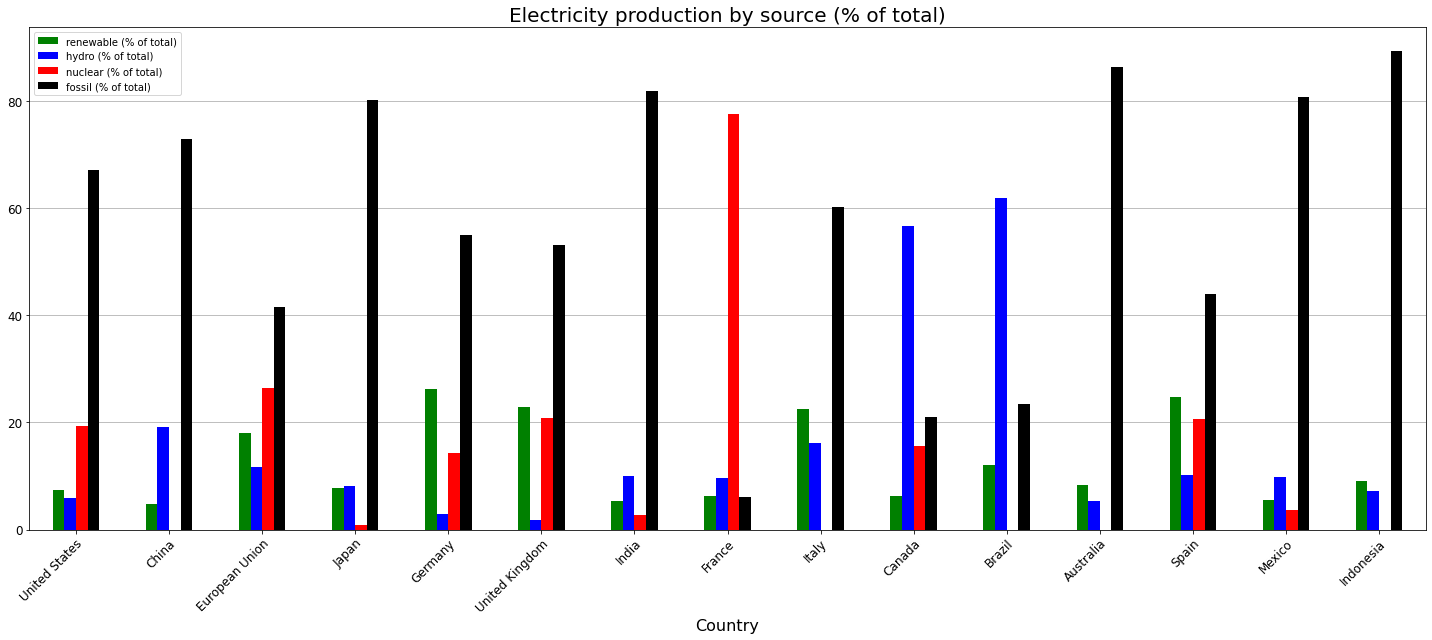

In [7]:
colour_dict = {'renewable (% of total)' : 'green', 'hydro (% of total)' : 'blue', 'nuclear (% of total)' : 'red', 'fossil (% of total)' : 'black'}
data.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[colour_dict.get(x, '#333333') for x in data.columns],
    fontsize=12
).legend(loc="upper left")
ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)
ax.yaxis.grid(zorder=0)
ax.set_title('Electricity production by source (% of total)', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()